<a href="https://colab.research.google.com/github/Sk2802/Sk2802/blob/main/finel_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from scipy import stats
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/Sk2802/flight-analysis/main/passenger%20data.csv")
df1=pd.read_csv("https://raw.githubusercontent.com/Sk2802/flight-analysis/main/survery%20data.csv")

In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,114960,Female,Loyal Customer,55,Business travel,Business,2001
1,43337,Male,Loyal Customer,36,Business travel,Eco,387
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072
4,70039,Male,Loyal Customer,39,Business travel,Eco,183


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122454 entries, 0 to 122453
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               122454 non-null  int64 
 1   Gender           122454 non-null  object
 2   Customer Type    122454 non-null  object
 3   Age              122454 non-null  int64 
 4   Type of Travel   122454 non-null  object
 5   Class            122454 non-null  object
 6   Flight Distance  122454 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.5+ MB


In [5]:
df1.head()

,id,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Inflight wifi service              129880 non-null  int64  
 2   Departure/Arrival time convenient  129880 non-null  int64  
 3   Ease of Online booking             129880 non-null  int64  
 4   Gate location                      129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Online boarding                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   On-board service                   129880 non-null  int64  
 10  Leg room service                   129880 non-null  int64  
 11  Baggage handling                   1298

In [8]:
df3=df.join(df1.set_index('id'), on='id')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122454 entries, 0 to 122453
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 122454 non-null  int64  
 1   Gender                             122454 non-null  object 
 2   Customer Type                      122454 non-null  object 
 3   Age                                122454 non-null  int64  
 4   Type of Travel                     122454 non-null  object 
 5   Class                              122454 non-null  object 
 6   Flight Distance                    122454 non-null  int64  
 7   Inflight wifi service              122454 non-null  int64  
 8   Departure/Arrival time convenient  122454 non-null  int64  
 9   Ease of Online booking             122454 non-null  int64  
 10  Gate location                      122454 non-null  int64  
 11  Food and drink                     1224

In [ ]:
df3.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             369
satisfaction                           0
dtype: int64

In [9]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance]
Index: []


In [10]:
df4=df3.dropna()

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122085 entries, 0 to 122453
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 122085 non-null  int64  
 1   Gender                             122085 non-null  object 
 2   Customer Type                      122085 non-null  object 
 3   Age                                122085 non-null  int64  
 4   Type of Travel                     122085 non-null  object 
 5   Class                              122085 non-null  object 
 6   Flight Distance                    122085 non-null  int64  
 7   Inflight wifi service              122085 non-null  int64  
 8   Departure/Arrival time convenient  122085 non-null  int64  
 9   Ease of Online booking             122085 non-null  int64  
 10  Gate location                      122085 non-null  int64  
 11  Food and drink                     1220

In [ ]:
df4.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
f= (df4.satisfaction == "neutral or dissatisfied") 
df4.loc[f,'satisfaction'] = "No"
f= (df4.satisfaction == "satisfied") 
df4.loc[f,'satisfaction'] = "yes"

In [12]:
df4['satisfaction']

0         yes
1          No
2          No
3          No
4         yes
         ... 
122449    yes
122450     No
122451     No
122452    yes
122453     No
Name: satisfaction, Length: 122085, dtype: object

In [ ]:
for i in df4.columns:
    print(i)

id
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance


In [13]:
numerical = ['id','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']



In [14]:
category= ["Gender","Customer Type","Age","Type of Travel","Class","Flight Distance"]

In [ ]:
df4[category]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0
1,Male,disloyal Customer,25.0,Business travel,Business,235.0
2,Female,Loyal Customer,26.0,Business travel,Business,1142.0
3,Female,Loyal Customer,25.0,Business travel,Business,562.0
4,Male,Loyal Customer,61.0,Business travel,Business,214.0
...,...,...,...,...,...,...
129875,Male,disloyal Customer,34.0,Business travel,Business,526.0
129876,Male,Loyal Customer,23.0,Business travel,Business,646.0
129877,Female,Loyal Customer,17.0,Personal Travel,Eco,828.0
129878,Male,Loyal Customer,14.0,Business travel,Business,1127.0


In [ ]:
print(len(category))
print(len(numerical))

6
17


In [ ]:
for i in df4[numerical]:
    print(i)

id
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes


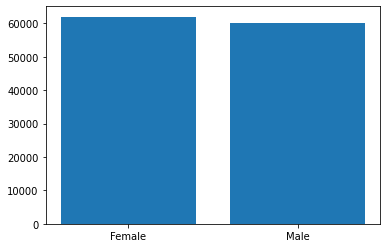

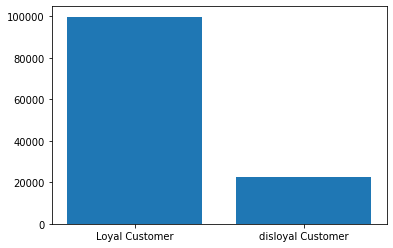

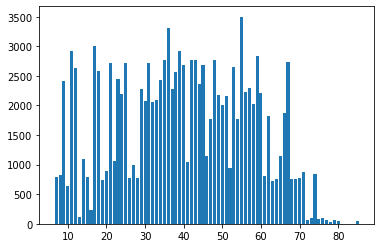

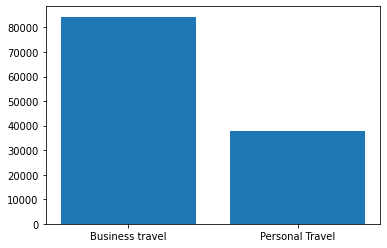

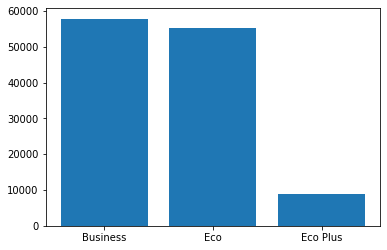

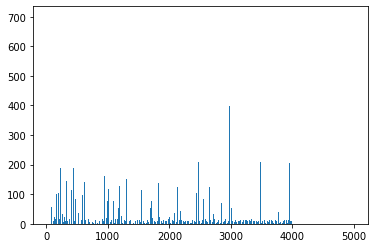

In [15]:
for i in df4[category]:
    d  =  df4[i].unique()
    x =   df4[i].value_counts()
    plt.bar(d,x)
    #print(df4[i].value_counts())
    plt.show()

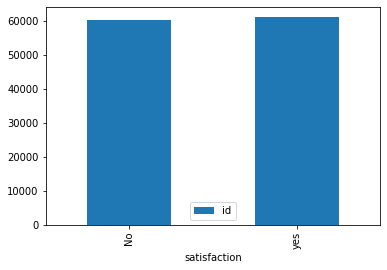

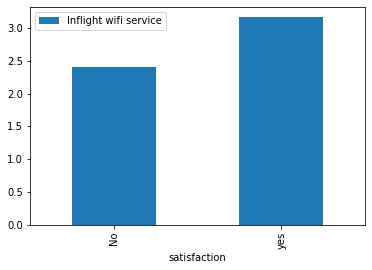

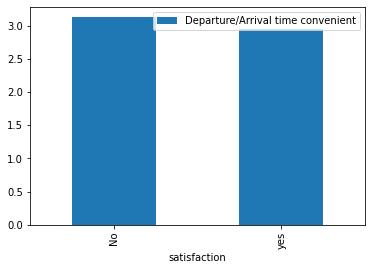

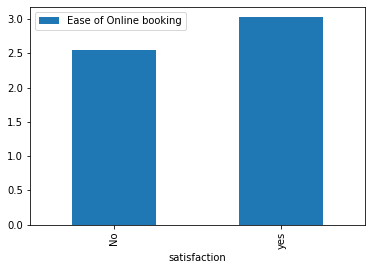

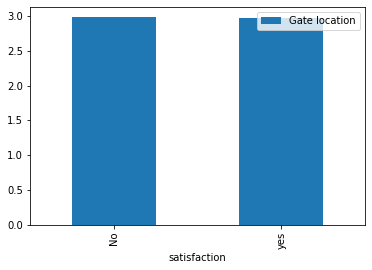

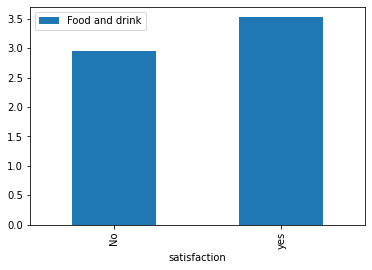

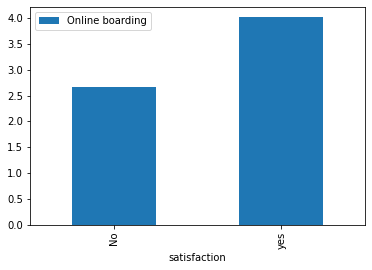

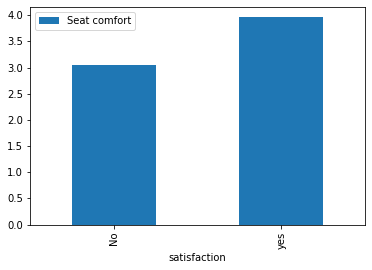

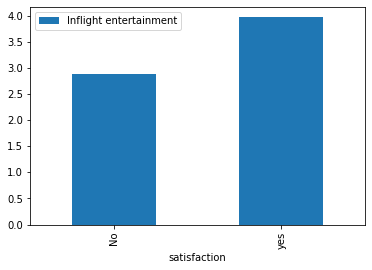

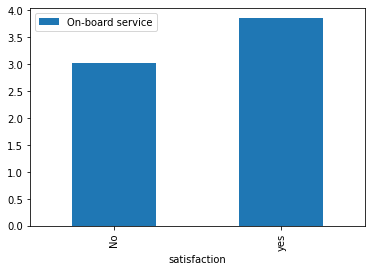

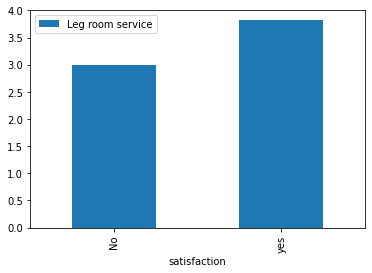

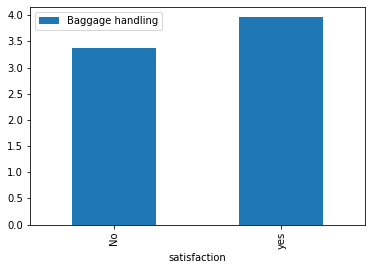

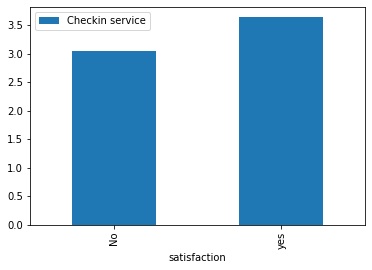

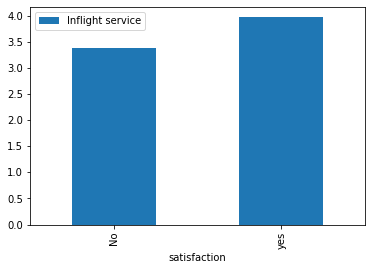

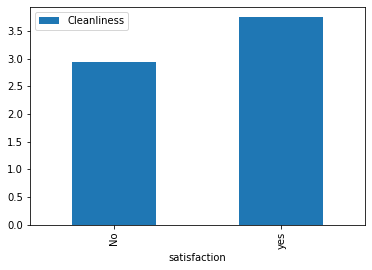

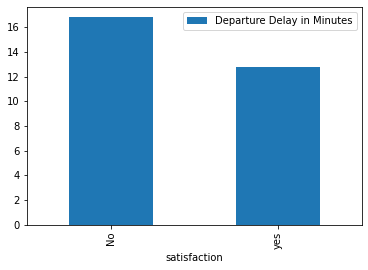

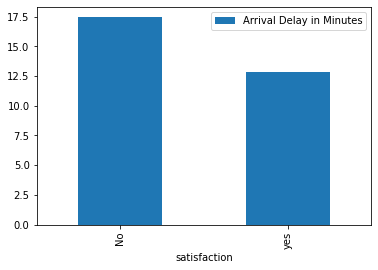

In [16]:
for i in numerical:
    grp = df4.groupby(["satisfaction"]).mean()[[i]]
    grp.plot.bar(stacked=True)
    

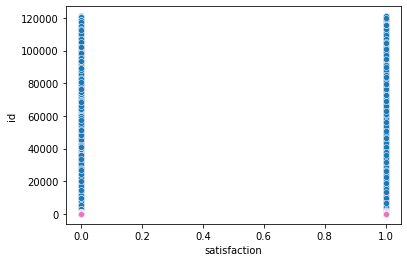

In [17]:
x=df4['satisfaction']=="No"
for i in numerical:
  y=df4[i]
  sns.scatterplot(data=df4, x=x, y=y)   

In [ ]:
for i in df4:
    d  =  df4[i].unique()
    x =   df4[i].value_counts()
    plt.bar(d,x)
    plt.show()

id


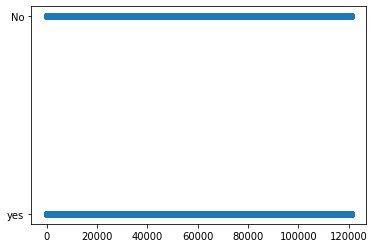

Inflight wifi service


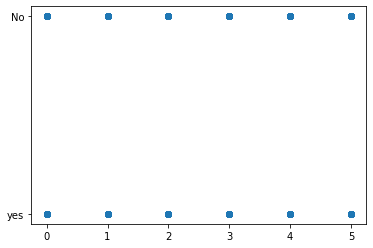

Departure/Arrival time convenient


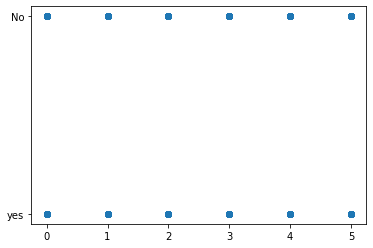

Ease of Online booking


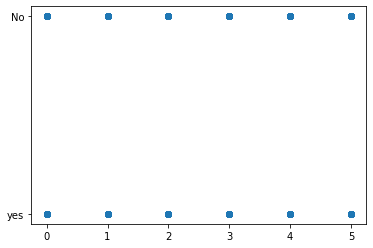

Gate location


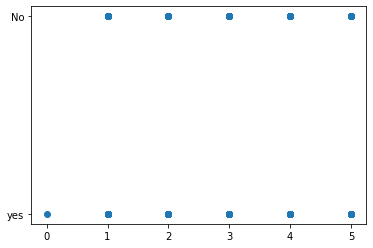

Food and drink


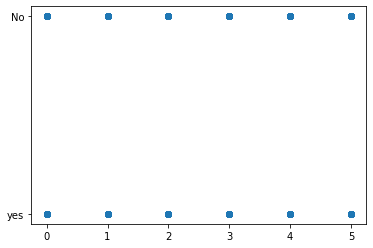

Online boarding


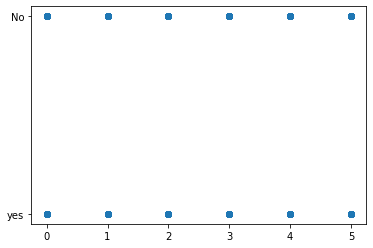

Seat comfort


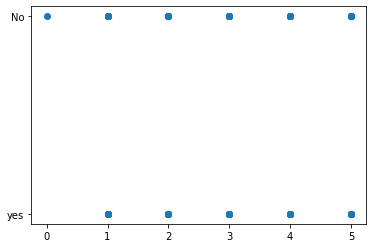

Inflight entertainment


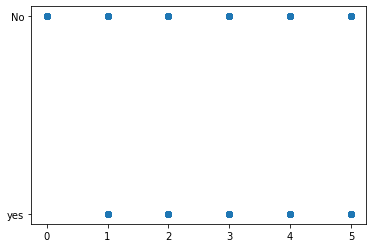

On-board service


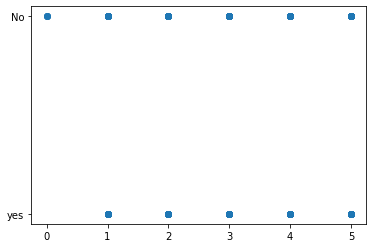

Leg room service


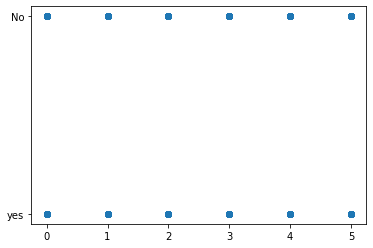

Baggage handling


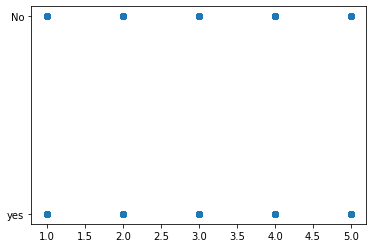

Checkin service


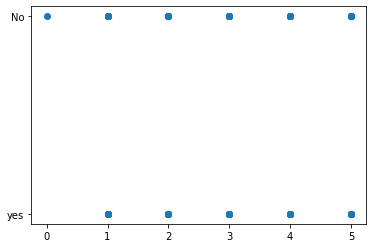

Inflight service


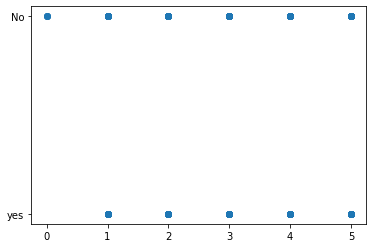

Cleanliness


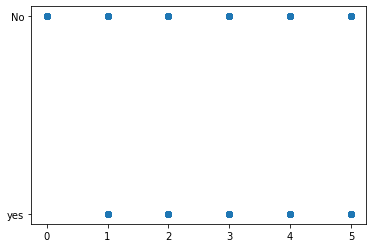

Departure Delay in Minutes


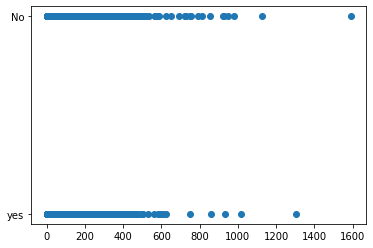

Arrival Delay in Minutes


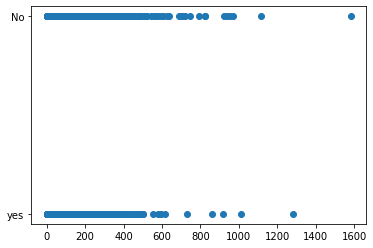

In [ ]:
for i in df4[numerical]:
  plt.scatter(x=df4[i],y=df4['satisfaction'])
  print(i)
  plt.show()